In [35]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [20]:
x1=[1,3,4,2,0,5]; x1 = x1 + [-e for e in x1]
y1=[3,2,5,3,2,5]; y1 = y1 + [-e for e in y1]
x2=[6,8,9,7,5,4]; x2 = x2 + [-e for e in x2]
y2=[9,7,11,9,7,8]; y2 = y2 + [-e for e in y2]

In [38]:
d = {'x': x1+x2, 'y': y1+y2, 'c':[0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]}
df = pd.DataFrame(d)
df.head()

,x,y,c
0,1,3,0
1,3,2,0
2,4,5,0
3,2,3,0
4,0,2,0


In [45]:
df.shape

(24, 3)

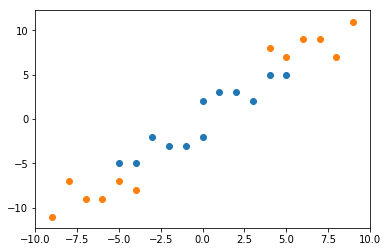

In [43]:
plt.scatter(df.x[df.c==0],df.y[df.c==0])
plt.scatter(df.x[df.c==1],df.y[df.c==1])
plt.show()

In [29]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


In [46]:
#kernal trick
zx1 = [e**2 for e in df.x[df.c==0]]
zy1 = [e**2 for e in df.y[df.c==0]]

zx2 = [e**2 for e in df.x[df.c==1]]
zy2 = [e**2 for e in df.y[df.c==1]]

best fit line:
y = 4.76 + 0.86x
best fit line:
y = 44.43 + 0.66x


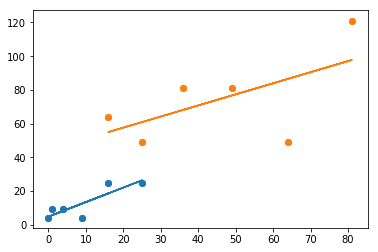

In [48]:
plt.scatter(zx1,zy1)
a, b = best_fit(zx1, zy1)
yfit1 = [a + b * xi for xi in zx1]
plt.plot(zx1, yfit1)

plt.scatter(zx2,zy2)
a, b = best_fit(zx2, zy2)
yfit2 = [a + b * xi for xi in zx2]
plt.plot(zx2, yfit2)

plt.show()

In [66]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
svm = LinearSVC()
lrc = LogisticRegression()

In [67]:
x = df.drop(['c'],axis=1)
y = df.c
x.shape

(24, 2)

In [68]:
svm.fit(x,y)
lrc.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
pred_svm = svm.predict(x)
pred_lrc = lrc.predict(x)

In [70]:
from sklearn.metrics import classification_report
print("svm:")
print(classification_report(pred_svm, y))
print("")
print("lrc:")
print(classification_report(pred_lrc, y))

svm:
              precision    recall  f1-score   support

           0       0.17      0.40      0.24         5
           1       0.75      0.47      0.58        19

   micro avg       0.46      0.46      0.46        24
   macro avg       0.46      0.44      0.41        24
weighted avg       0.63      0.46      0.51        24


lrc:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50        24
   macro avg       0.50      0.25      0.33        24
weighted avg       1.00      0.50      0.67        24



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
